## Objective
Create the Key statistics dashboard and graphs for chapter "The popularity of SBTi"


# Importing, loading data, visuals and error corrections

In [36]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Slider, CustomJS, Legend, LegendItem
from bokeh.layouts import column
from bokeh.palettes import Category20
from bokeh.palettes import TolRainbow
from bokeh.transform import factor_cmap
from bokeh.plotting import output_notebook

from itertools import cycle
# Ensure Bokeh plots are displayed in the notebook
output_notebook()

Loading BokehJS ...

In [37]:
#Font properties for the plots
#font_prop = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\source-sans-pro.ttf')
font_reg = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Regular.otf")
font_bold = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Bold.otf")
font_italic = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-It.ttf")
font_light = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Light.otf")

In [38]:
sbt_palette = [
    "#F26749",  # Crab
    "#F5B7B1",  # Warm Blush
    "#83A5F2",  # Vista blue
    "#204ECF",  # Deep Ocean
    "#EA9836",  # Butterscotch
    # Pastel extended palette
    "#F28C70",  # Lighter Crab
    "#B23A1D",  # Darker Crab
    "#FADBD8",  # Lighter Warm Blush
    "#E5989B",  # Deeper Warm Blush
    "#A1B6F5",  # Lighter Vista Blue
    "#516FD9",  # Midpoint Blue
    "#122E8A",  # Darker Deep Ocean
    "#7C9BF2",  # Muted Vista Blue
    "#A8D5BA",  # Lighter Green (Replacing Lighter Butterscotch)
    "#9C4700",  # More Contrasty Butterscotch
    "#F2E1DC",  # Soft Neutral
    "#F4C2C2",  # Warm Neutral
    "#CBD4F7",  # Soft Cool Tone
    "#BFD0E5",  # Neutral Blue Tint
    "#D47A5F",  # Earthy Warm Blend
    "#8C9EFF",  # Punchy Cool Accent
    "#F7D59C",  # Pale Orange Glow
    "#F7A76C",  # Vibrant Warm
    "#D44A1C",  # Bold Warm Tone
    "#8390F2",  # Cool Complement 
]

In [39]:
# Load the data
filepath1 = r'ByCompany.csv'
Comp = pd.read_csv(filepath1, sep=';')
filepath2 = r'ByTargets.csv'
Targ = pd.read_csv(filepath2, sep=';')

In [40]:
# Mapping of sectors to categories
sector_category_map = {
    'Ground Transportation - Railroads Transportation': 'Transportation',
    'Semiconductors and Semiconductors Equipment': 'Technology',
    'Air Freight Transportation and Logistics': 'Transportation',
    'Trading Companies and Distributors, and Commercial Services and Supplies': 'Commercial Services',
    'Water Transportation - Water Transportation': 'Transportation',
    'Food and Beverage Processing': 'Food and Beverage',
    'Telecommunication Services': 'Telecommunication',
    'Construction and Engineering': 'Construction',
    'Pharmaceuticals, Biotechnology and Life Sciences': 'Healthcare',
    'Professional Services': 'Professional Services',
    'Containers and Packaging': 'Packaging',
    'Real Estate': 'Real Estate',
    'Consumer Durables, Household and Personal Products': 'Consumer Products',
    'Electric Utilities and Independent Power Producers and Energy Traders (including Fossil, Alternative and Nuclear Energy)': 'Energy',
    'Retailing': 'Retail',
    'Mining - Iron, Aluminum, Other Metals': 'Mining',
    'Textiles, Apparel, Footwear and Luxury Goods': 'Consumer Products',
    'Software and Services': 'Technology',
    'Hotels, Restaurants and Leisure, and Tourism Services': 'Hospitality',
    'Electrical Equipment and Machinery': 'Manufacturing',
    'Food Production - Agricultural Production': 'Food Production',
    'Building Products': 'Construction',
    'Food and Staples Retailing': 'Retail',
    'Automobiles and Components': 'Automotive',
    'Forest and Paper Products - Forestry, Timber, Pulp and Paper, Rubber': 'Forestry and Paper Products',
    'Tobacco': 'Tobacco',
    'Solid Waste Management Utilities': 'Utilities',
    'Chemicals': 'Chemicals',
    'Construction Materials': 'Construction',
    'Technology Hardware and Equipment': 'Technology',
    'Mining - Other (Rare Minerals, Precious Metals and Gems)': 'Mining',
    'Water Utilities': 'Utilities',
    'Homebuilding': 'Construction',
    'Ground Transportation - Highways and Railtracks': 'Transportation',
    'Food Production - Animal Source Food Production': 'Food Production',
    'Healthcare Equipment and Supplies': 'Healthcare',
    'Air Transportation - Airport Services': 'Transportation',
    'Media': 'Media',
    'Banks, Diverse Financials, Insurance': 'Financial Services',
    'Ground Transportation - Trucking Transportation': 'Transportation',
    'Specialized Consumer Services': 'Consumer Services',
    'Specialized Financial Services, Consumer Finance, Insurance Brokerage Firms': 'Financial Services',
    'Healthcare Providers and Services, and Healthcare Technology': 'Healthcare',
    'Water Transportation - Ports and Services': 'Transportation',
    'Air Transportation - Airlines': 'Transportation',
    'Aerospace and Defense': 'Defense',
    'Tires': 'Automotive',
    'Education Services': 'Education',
    'Gas Utilities': 'Utilities'
}

# Function to map sectors to categories
def map_category(sector):
    return sector_category_map.get(sector, 'Unknown')
# Apply the function to the 'sector' column
Targ['sectorCat'] = Targ['sector'].apply(map_category)
Comp['sectorCat'] = Comp['sector'].apply(map_category)
# Display the DataFrame
Targ['sectorCat'].unique()
# Place sectorCat next to sector in the DataFrame
Targ = Targ[['sector', 'sectorCat'] + [col for col in Targ.columns if col not in ['sector', 'sectorCat']]]
Comp = Comp[['sector', 'sectorCat'] + [col for col in Comp.columns if col not in ['sector', 'sectorCat']]]

In [41]:
#make Targ['date_published'] a datetime object
Targ['date_published'] = pd.to_datetime(Targ['date_published'], errors='coerce')
#seperate year from date_published
Targ['Comitted year'] = Targ['date_published'].dt.year
#sort targ by year
Targ = Targ.sort_values(by='Comitted year', ascending=True)
# limit to 2015-2024
Targ = Targ[Targ['Comitted year'].between(2015, 2024)]
#check if year is sorted correctly
Targ['Comitted year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [42]:
# Remove duplicates of stbi_id in Targ to make counting easier
#Targ = Targ.drop_duplicates(subset=['sbti_id'])

In [43]:

Comp['date_updated'] = pd.to_datetime(Comp['date_updated'], errors='coerce')
#isolating year in Comp
Comp['year_updated'] = Comp['date_updated'].dt.year
Comp=Comp.sort_values(by='year_updated', ascending=True)
Comp = Comp[Comp['year_updated'].between(2015, 2024)]
#Check if year is sorted correctly
Comp['year_updated'].unique()

C:\Users\gfjgu\AppData\Local\Temp\ipykernel_7056\645255393.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Comp['date_updated'] = pd.to_datetime(Comp['date_updated'], errors='coerce')


array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [44]:
Comp.head()

,sector,sectorCat,sbti_id,company_name,organization_type,location,region,near_term_status,near_term_target_classification,near_term_target_year,...,long_term_target_year,net_zero_status,net_zero_year,reason_for_extension_or_removal,date_updated,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,year_updated
4243,"Banks, Diverse Financials, Insurance",Financial Services,40008661,Teachers Mutual Bank,Financial Institution,Australia,Oceania,Commitment removed,NaN,NaN,...,NaN,NaN,NaN,Expired commitment,2015-11-01,NaN,NaN,NaN,NaN,2015
4300,Ground Transportation - Railroads Transportation,Transportation,40005752,Thalys,Corporate,Belgium,Europe,Targets set,Well-below 2°C,2020,...,NaN,NaN,NaN,NaN,2015-10-30,NaN,NaN,NaN,NaN,2015
527,"Banks, Diverse Financials, Insurance",Financial Services,40007348,AXA Group,Financial Institution,France,Europe,Committed,NaN,NaN,...,NaN,NaN,NaN,Commitment Compliance Policy transitory grace ...,2015-06-01,NaN,NaN,NaN,NaN,2015
573,"Banks, Diverse Financials, Insurance",Financial Services,40013764,Bank J. Safra Sarasin AG,Financial Institution,Switzerland,Europe,Committed,NaN,NaN,...,NaN,NaN,NaN,FINZ extension policy,2015-06-01,NaN,NaN,NaN,NaN,2015
2206,"Banks, Diverse Financials, Insurance",Financial Services,40005141,ING,Financial Institution,Netherlands,Europe,Committed,NaN,NaN,...,NaN,NaN,NaN,FINZ extension policy,2015-06-01,NaN,NaN,NaN,NaN,2015


In [45]:
Targ.head()

,sector,sectorCat,sbti_id,company_name,location,region,organization_type,action,company_temperature_alignment,target,scope,target_value,type,sub_type,target_classification_short,base_year,target_year,date_published,Comitted year
9915,Ground Transportation - Railroads Transportation,Transportation,40005752,Thalys,Belgium,Europe,Corporate,Target,Well-below 2°C,Near-term,1+2+3,"41,40%",Intensity,Reduction,Well-below 2°C,2008,2020,2015-10-30,2015
9916,Ground Transportation - Railroads Transportation,Transportation,40005752,Thalys,Belgium,Europe,Corporate,Target,Well-below 2°C,Near-term,3,"50,00%",Engagement,Other,NaN,2017,2020,2015-10-30,2015
506,Semiconductors and Semiconductors Equipment,Technology,40015387,"Advanced Micro Devices, Inc",United States of America,Northern America,Corporate,Target,Well-below 2°C,Near-term,3,"0,4",Engagement,Other,NaN,2014,2020,2016-06-27,2016
505,Semiconductors and Semiconductors Equipment,Technology,40015387,"Advanced Micro Devices, Inc",United States of America,Northern America,Corporate,Target,Well-below 2°C,Near-term,3,30%,Engagement,Other,NaN,2014,2020,2016-06-27,2016
5137,Air Freight Transportation and Logistics,Transportation,40010493,International Post Corporation (IPC),Belgium,Europe,Corporate,Target,2°C,Near-term,1+2+3,20%,Intensity,Reduction,2°C,2013,2025,2016-02-05,2016


# Key statistical dashboard
We want to make the following key numbers and present them with a nice finish
1. Total companies with SBTi targets validated by the SBTi by the end of 2024
2. Increase in the number of companies with SBTi targets by the end of 2024 compared to 2023
3. Nr of companies set SBTi targets for the first time in 2024
4. Increase in companies with net-zero targets in 2024
5. Total accumulative expired targets
6. Total companies that have retracted their targets

In [46]:
# Count number of commitments in company data --------- 1
Comp['commitments'] = Comp.groupby('company_name')['company_name'].transform('count')

# Count the increase in commitments between 2023 and 2024 in company data
Comp['commitments_2023'] = Comp[Comp['year_updated'].isin([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])]['commitments']
Comp['commitments_2024'] = Comp[Comp['year_updated'] == 2024]['commitments'] # ------------ 3

# Calculate the % increase in commitments between 2023 and 2024 # ------------ 2
Pincrease24 = (Comp['commitments_2024'].sum() / Comp['commitments_2023'].sum()) * 100

# Count net zero targets in target data
Targ['net_zero'] = Targ[Targ['target'] == 'Net-zero'].groupby('sbti_id')['sbti_id'].transform('count')

# Count net zero targets in 2024 in target data
Targ['net_zero_24'] = Targ[(Targ['target'] == 'Net-zero') & (Targ['Comitted year'] == 2024)].groupby('sbti_id')['sbti_id'].transform('count')

#Count companies with expired commitments ------------- 5
Comp['Expired'] = Comp[Comp['reason_for_extension_or_removal'] == 'Expired commitment'].groupby('sbti_id')['sbti_id'].transform('count')

# Count companies wih retracted commitments ------------- 6
Comp['Withdrawn'] = Comp[Comp['reason_for_extension_or_removal'] == 'Withdrawn commitment'].groupby('sbti_id')['sbti_id'].transform('count')

# Highlighting 6 key values
# Storing the values in a dictionary for easy access
Comp_values = {
    'commitments': Comp['commitments'].sum(),
    'Pincrease24': f"{Pincrease24.sum():.0f}%",  # Display as percentage
    'commitments_2024': Comp['commitments_2024'].sum(),
    'net_zero': Targ['net_zero'].sum(),
    'net_zero_2024': Targ['net_zero_24'].sum(),
    'expired': Comp['Expired'].sum(),
    'retracted': Comp['Withdrawn'].sum()
}
# Display the values
for key, value in Comp_values.items():
    print(f"{key}: {value}")


commitments: 10058
Pincrease24: 81%
commitments_2024: 4506.0
net_zero: 1430.0
net_zero_2024: 867.0
expired: 920.0
retracted: 32.0


# The graphs for chapter "The popularity of SBTi"
Graph answering the questions:
* When did it start?
* How has it grown?
* How has popularity grown based on organisation type (SME, corporation, financial etc)?

Graphs answering the questions:
* What countries and industry sectors were the first to register?
* With which countries and industries is SBTi most popular?
* What industries are most popular in each european country?

In [47]:
# Plotting the accumulated number of commitments by year
# Count the number of commitments per year
commitments_per_year = Targ.groupby('Comitted year').size().reset_index(name='commitments')
# Create a cumulative sum of commitments
commitments_per_year['cumulative_commitments'] = commitments_per_year['commitments'].cumsum()
# Create a Bokeh plot
output_file("commitments_per_year.html")
p = figure(title="Cumulative Commitments by Year", x_axis_label='Year', y_axis_label='Cumulative Commitments', width=800, height=400)
p.line(commitments_per_year['Comitted year'], commitments_per_year['cumulative_commitments'], line_width=2, color='blue', legend_label='Cumulative Commitments')
p.circle(commitments_per_year['Comitted year'], commitments_per_year['cumulative_commitments'], size=8, color='red', legend_label='Commitments')
p.legend.location = "top_left"
# Plot the figure
show(p)

In [48]:
#sorting the number of companies with validated targets away from companies with commited or removed commitment
org = Comp[['organization_type', 'near_term_status', 'long_term_status', ' net_zero_status', 'year_updated']].reset_index(drop=True)

# Create an empty list to store rows for the result
rows = []

# Loop through the rows of the dataset
for index, row in org.iterrows():
    # Check if "Targets set" exists in any of the relevant columns
    if any(status == "Targets set" for status in [row["near_term_status"], row["long_term_status"], row[" net_zero_status"]]):
        # Append the row's relevant data to the list
        rows.append({
            "organization_type": row["organization_type"],
            "year_updated": row["year_updated"]
        })

# Convert the list of rows into a new DataFrame
org_sorted = pd.DataFrame(rows)

#count the number of companies within each organisational type with validated targets 
org_growth = org_sorted.groupby(['organization_type', 'year_updated']).size().reset_index(name='count') 


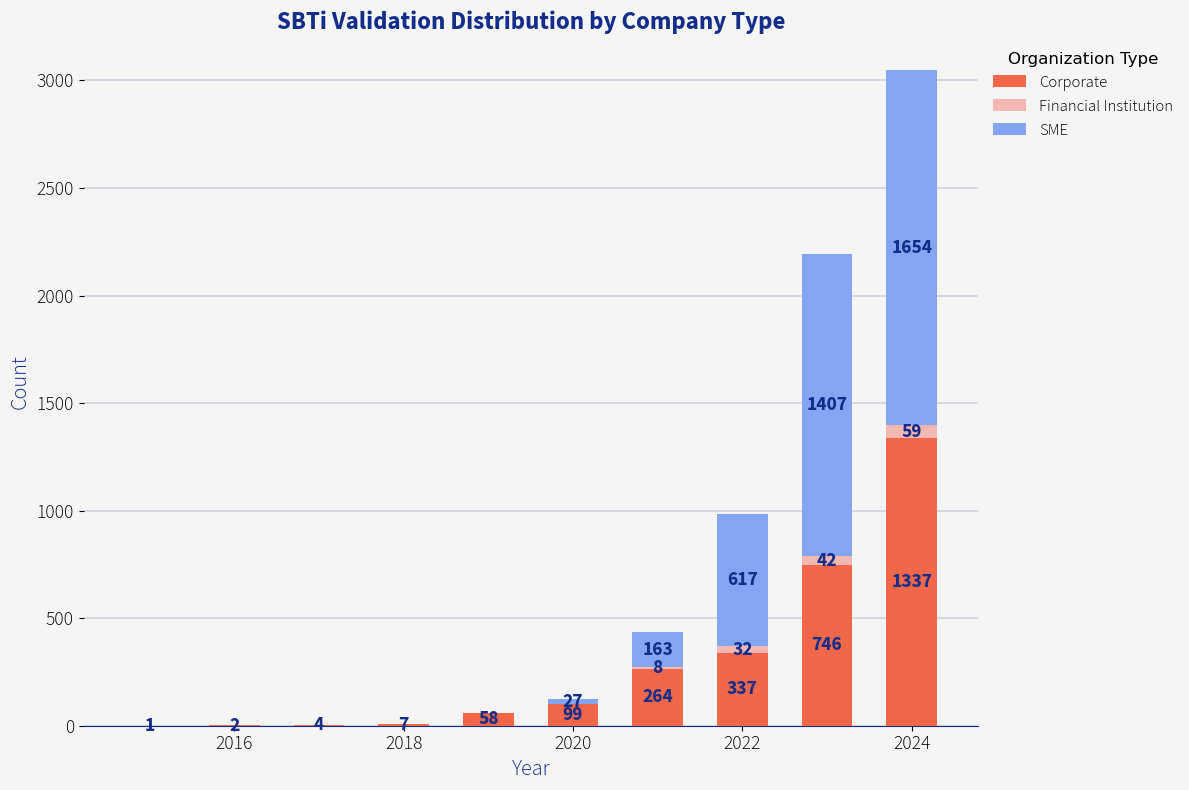

In [49]:
# Pivot the data to prepare it for stacked bar plotting
pivot_data = org_growth.pivot(index="year_updated", columns="organization_type", values="count").fillna(0)

# Sort by year
pivot_data = pivot_data.sort_index()

# Plot background color and bar color
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(12, 8))  # Set fixed plot size (width, height)

# Adjust the width of the bars here to change the distance between them
bar_width = 0.6  # Change this value to make bars closer (lower value) or farther apart (higher value)

# Plot stacked bars
bottom_vals = None
for i, col in enumerate(pivot_data.columns):
    if bottom_vals is None:
        bars = ax.bar(pivot_data.index, pivot_data[col], color=sbt_palette[i], zorder=3, width=bar_width, label=col)
        bottom_vals = pivot_data[col]
    else:
        ax.bar(pivot_data.index, pivot_data[col], color=sbt_palette[i], zorder=3, width=bar_width, label=col, bottom=bottom_vals)
        bottom_vals += pivot_data[col]

# Set facecolor
ax.set_facecolor("#f5f5f5")

# Set title with font properties
ax.set_title("SBTi Validation Distribution by Company Type", fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")
ax.set_ylabel("Count", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xlabel("Year", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)
    label.set_size(14)

for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)
    label.set_size(14)

# Add data labels to the stacked bars
for bar_group in ax.containers:
    for bar in bar_group:
        if bar.get_height() > 0:  # Only label non-zero bars
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + bar.get_height() / 2, 
                f'{int(bar.get_height())}', 
                ha='center', va='center', fontsize=14, color="#122E8A", fontproperties=font_bold
            )

# Spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    
ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)
font_legend = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Light.otf", size=12)  # Set the font size here


# Add legend
ax.legend(
    title="Organization Type", 
    loc="upper left", 
    bbox_to_anchor=(1, 1), 
    frameon=False, 
    prop=font_legend,
    title_fontsize=12
)

plt.tight_layout()
plt.show()